In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("uciml/sms-spam-collection-dataset")

print("Path to dataset files:", path)

100%|██████████| 211k/211k [00:00<00:00, 300kB/s]

Extracting files...
Path to dataset files: C:\Users\Kareem Ehab\.cache\kagglehub\datasets\uciml\sms-spam-collection-dataset\versions\1


In [3]:
import pandas as pd
data=pd.read_csv(path+"/spam.csv", encoding='latin-1')[['v1','v2']]
data.columns = ['label', 'message']
data.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import nltk
nltk.download('stopwords')
ps=PorterStemmer()
stop_words=set(stopwords.words('english'))
def clean_text(text):
    text=re.sub('[^a-zA-Z]', ' ', text)
    text=text.lower().split()
    text=[ps.stem(word) for word in text if not word in stop_words]
    return " ".join(text)
data['cleaned']=data['message'].apply(clean_text)

[nltk_data] Downloading package stopwords to C:\Users\Kareem
[nltk_data]     Ehab\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer= TfidfVectorizer(max_features=3000)
x=vectorizer.fit_transform(data['cleaned']).toarray()
y=data['label'].map({'ham':0, 'spam':1}).values

In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)


In [7]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
model=MultinomialNB()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print("Accuracy:",accuracy_score(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Classification Report:\n",classification_report(y_test,y_pred))

Accuracy: 0.9766816143497757
Confusion Matrix:
 [[965   1]
 [ 25 124]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       966
           1       0.99      0.83      0.91       149

    accuracy                           0.98      1115
   macro avg       0.98      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115



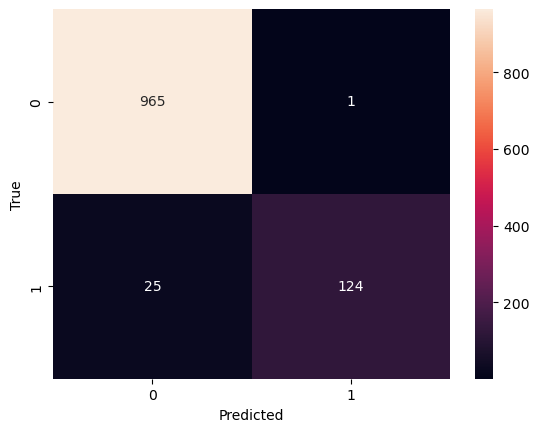

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()